<a href="https://colab.research.google.com/github/Felipe-Loureiro/Trainee-CIS-2024/blob/main/Periodo_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
from google.colab import drive
from google.colab import files
from PIL import Image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
import matplotlib.pyplot as plt
drive.mount('/content/drive')
import os
from sklearn.model_selection import train_test_split

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')

if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

In [ ]:
data_dir = '/content/drive/MyDrive/UnB/IEEE Computational Intelligence Society, UnB/PS 2024/Período 5/archive (5)/animals/animals'

In [ ]:
categorias_dataset = sorted(os.listdir(data_dir))
categorias_dataset

['cats', 'dogs', 'panda']

In [ ]:
batch_size=256
altura_imagem=224
largura_imagem=224
image_size=(altura_imagem, largura_imagem)

In [ ]:
def load_data_from_folder(folder_path):
    images = []
    labels = []
    folder_path = '/content/drive/MyDrive/UnB/IEEE Computational Intelligence Society, UnB/PS 2024/Período 5/archive (5)/animals/animals'
    categories = sorted(os.listdir(folder_path))

    for label, category in enumerate(categories):
        category_path = os.path.join(folder_path, category)
        if not os.path.isdir(category_path):
            continue
        for img_file in os.listdir(category_path):
            img_path = os.path.join(category_path, img_file)
            if img_path.endswith(('jpg', 'jpeg', 'png')):
                img = Image.open(img_path).convert('RGB')  # Converter para RGB para uniformidade
                img = img.resize((224, 224))
                img_array = np.array(img)  # Converte a imagem em um array NumPy
                images.append(img_array)
                labels.append(label)
        print("Carregada a categoria", label)

    images = np.array(images, dtype='float32')  # Converte a lista de imagens em um array NumPy
    labels = np.array(labels)

    X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
    y_train = y_train.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)

    print("Dados Carregados")
    return (X_train, y_train), (X_test, y_test)

In [ ]:
(X_train, y_train), (X_test, y_test) = load_data_from_folder('/content/drive/MyDrive/UnB/IEEE Computational Intelligence Society, UnB/PS 2024/Período 5/archive (5)/animals/animals')

Carregada a categoria 0
Carregada a categoria 1
Carregada a categoria 2
Dados Carregados


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=0)
y_valid_raw = y_valid

In [ ]:
X_train = X_train.astype('float32')
X_test  = X_test.astype('float32')
X_valid = X_valid.astype('float32')
y_train = to_categorical(y_train, 3)
y_valid = to_categorical(y_valid, 3)
y_test  = to_categorical(y_test, 3)

In [ ]:
from tensorflow.keras import layers, models, regularizers

model = models.Sequential()

# Camada 1: Convolution com 32 filtros, kernel 3x3, ativação relu
model.add(layers.Conv2D(32, (3, 3), strides=1, activation='relu', padding='same', input_shape=(largura_imagem, altura_imagem, 3)))

# Camada 2: Batch Normalization para estabilizar o treinamento
model.add(layers.BatchNormalization())

# Camada 3: Max Pooling, kernel 2x2, strides 2
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# Camada 4: Convolution com 64 filtros, kernel 3x3, ativação relu
model.add(layers.Conv2D(64, (3, 3), strides=1, activation='relu', padding='same'))

# Camada 5: Batch Normalization
model.add(layers.BatchNormalization())

# Camada 6: Max Pooling, kernel 2x2, strides 2
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# Camada 7: Convolution com 128 filtros, kernel 3x3, ativação relu
model.add(layers.Conv2D(128, (3, 3), strides=1, activation='relu', padding='same'))

# Camada 8: Batch Normalization
model.add(layers.BatchNormalization())

# Camada 9: Max Pooling, kernel 2x2, strides 2
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# Camada 10: Convolution com 256 filtros, kernel 3x3, ativação relu
model.add(layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same'))

# Camada 11: Batch Normalization
model.add(layers.BatchNormalization())

# Camada 12: Max Pooling, kernel 2x2, strides 2
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# Flatten a saída para conectar às camadas densas
model.add(layers.Flatten())

# Camada 13: Fully connected com 1024 neurônios, regularização L2
model.add(layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001)))

# Camada 14: Dropout para evitar overfitting
model.add(layers.Dropout(0.3))

# Camada 15: Fully connected com 512 neurônios, regularização L2
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))

# Camada 16: Dropout
model.add(layers.Dropout(0.2))

# Camada 17: Fully connected com 128 neurônios
model.add(layers.Dense(128, activation='relu'))

# Camada de saída: Fully Connected (densa) com num_classes neurônios, ativação softmax
model.add(layers.Dense(3, activation='softmax'))

# Compilar o modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=30,  # Aumentar a rotação para mais variedade
    width_shift_range=0.3,  # Aumentar o shift horizontal
    height_shift_range=0.3,  # Aumentar o shift vertical
    shear_range=0.3,  # Aumentar o shear para mais variações
    zoom_range=[0.8, 1.2],  # Zoom out/in mais variado
    horizontal_flip=True,  # Manter horizontal flip
    vertical_flip=True,  # Adicionar vertical flip para mais variações
    brightness_range=[0.8, 1.2],  # Variação de brilho
    channel_shift_range=30,  # Adicionar variação nas cores
    fill_mode='reflect'  # 'reflect' pode preservar melhor as bordas das imagens
)
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=25,  restore_best_weights=True)


In [ ]:
with tf.device('/device:GPU:0'):
  history = model.fit(data_generator.flow(X_train, y_train, batch_size=batch_size*2), epochs=100, validation_data=(X_valid, y_valid), callbacks=[es])

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.3628 - loss: 24.1320 - val_accuracy: 0.3583 - val_loss: 53.0369
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 29s 719ms/step - accuracy: 0.3998 - loss: 8.4154 - val_accuracy: 0.2875 - val_loss: 78.8889
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 29s 588ms/step - accuracy: 0.4191 - loss: 6.8447 - val_accuracy: 0.3583 - val_loss: 52.5148
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 29s 720ms/step - accuracy: 0.4129 - loss: 6.3280 - val_accuracy: 0.3042 - val_loss: 43.0189
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 29s 618ms/step - accuracy: 0.4521 - loss: 5.9531 - val_accuracy: 0.3833 - val_loss: 9.5314
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 29s 588ms/step - accuracy: 0.4728 - loss: 5.6567 - val_accuracy: 0.2875 - val_loss: 27.9946
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 29s 618ms/step - accuracy: 0.4860 - loss: 5.3202 - val_accuracy: 0.4500 - val_loss: 8.1525
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 29s 588ms/step - accuracy: 0.4948 - loss: 5.0802 - val_accuracy:

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


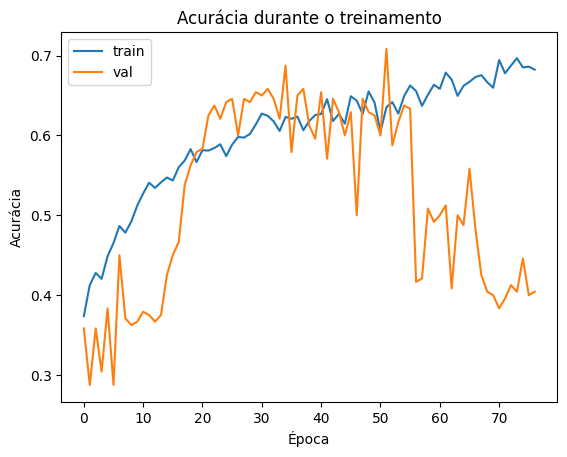

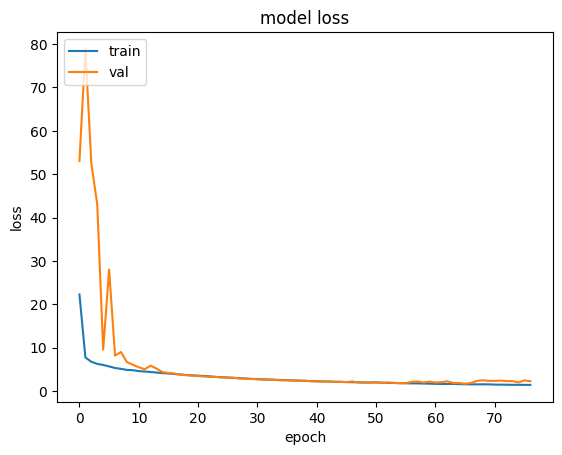

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Acurácia durante o treinamento')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


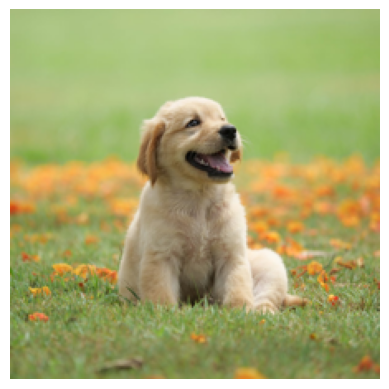

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step
classificação do modelo:  cats
[[0.47259519 0.44778723 0.07961759]]


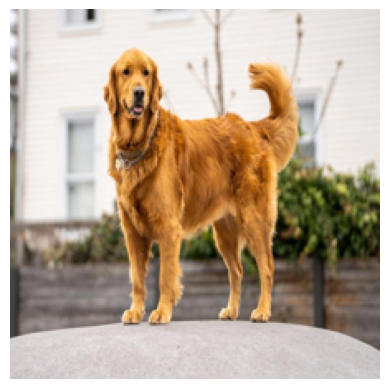

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
classificação do modelo:  dogs
[[0.32699415 0.6452171  0.02778872]]


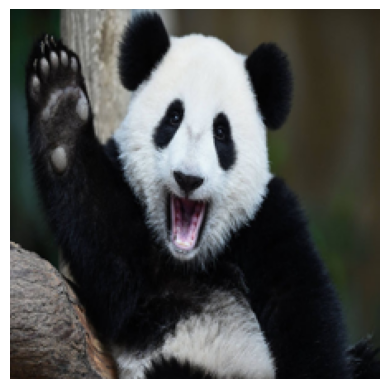

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
classificação do modelo:  cats
[[0.5148711  0.18874793 0.29638094]]


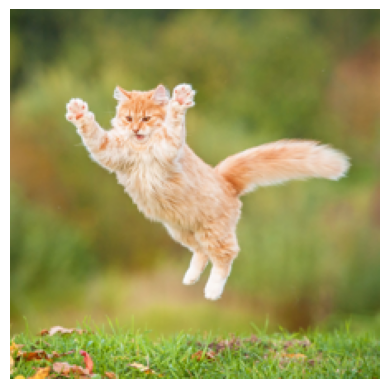

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
classificação do modelo:  cats
[[0.56184095 0.36565512 0.07250389]]


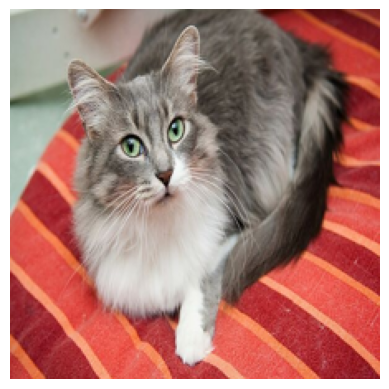

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
classificação do modelo:  cats
[[0.73293066 0.26155466 0.00551477]]


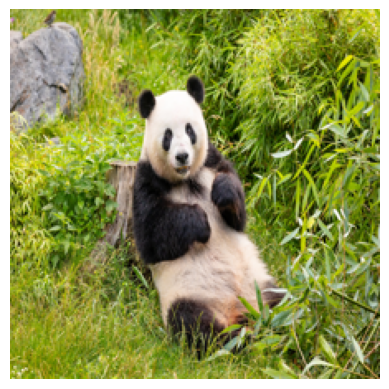

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
classificação do modelo:  panda
[[8.8572095e-04 7.7200599e-02 9.2191368e-01]]


In [ ]:
from io import BytesIO
import requests

# URLs das imagens
urls =['https://hips.hearstapps.com/hmg-prod/images/dog-puppy-on-garden-royalty-free-image-1586966191.jpg?crop=0.752xw:1.00xh;0.175xw,0&resize=1200:*',
       'https://images.squarespace-cdn.com/content/v1/54822a56e4b0b30bd821480c/45ed8ecf-0bb2-4e34-8fcf-624db47c43c8/Golden+Retrievers+dans+pet+care.jpeg',
       'https://s4.static.brasilescola.uol.com.br/img/2019/09/panda.jpg',
       'https://cdn.theatlantic.com/thumbor/vDZCdxF7pRXmZIc5vpB4pFrWHKs=/559x0:2259x1700/1080x1080/media/img/mt/2017/06/shutterstock_319985324/original.jpg',
       'https://www.pawschicago.org/fileadmin/_processed_/8/c/csm_garden1-1024x685_0438a114ad.jpg',
       'https://www.zoo-berlin.de/fileadmin/_processed_/8/1/csm_Grosser_Panda_-_Meng_Meng__3__1f1c2b513f.jpg'
       ]
  #
for i in urls:
  response = requests.get(i)
  image = Image.open(BytesIO(response.content))
  image = image.resize(image_size)
  # Converte a imagem para um array numpy
  image_array = img_to_array(image,dtype=np.uint8)

  plt.imshow(img_to_array(image,dtype=np.uint8))
  plt.axis('off')  # Hide axis
  plt.show()

  # Adiciona uma dimensão para transformar o array em um batch de tamanho 1
  image_array = np.expand_dims(image_array, axis=0)
  predictions = model.predict(image_array)
  print("classificação do modelo: ",categorias_dataset[np.argmax(predictions)])
  print(predictions)

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step


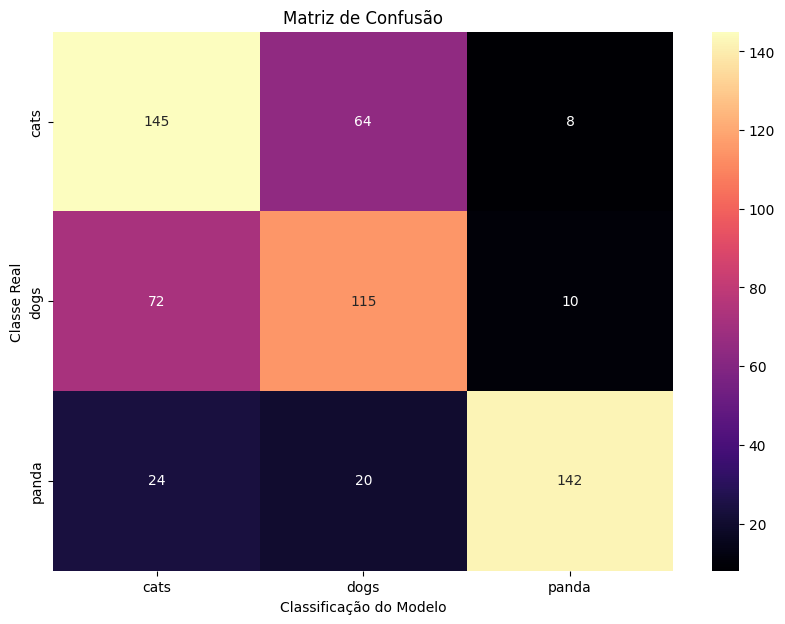

              precision    recall  f1-score   support

        cats       0.60      0.67      0.63       217
        dogs       0.58      0.58      0.58       197
       panda       0.89      0.76      0.82       186

    accuracy                           0.67       600
   macro avg       0.69      0.67      0.68       600
weighted avg       0.68      0.67      0.67       600



In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
y_cm=np.argmax(y_test,axis=1)
preds_cm = model.predict(X_test)
preds_cm = (tf.argmax(preds_cm,axis=1))
Cm = confusion_matrix(y_cm, preds_cm)
plt.figure(figsize = (10,7))
sns.heatmap(Cm, annot=True, fmt='d', cmap="magma", xticklabels=categorias_dataset, yticklabels=categorias_dataset)
plt.xlabel('Classificação do Modelo')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()
print(classification_report(y_cm,preds_cm, target_names=categorias_dataset))

In [ ]:
from tensorflow import keras

base_model = keras.applications.ConvNeXtXLarge(weights="imagenet", include_top=False, input_shape=(largura_imagem,altura_imagem,3))
base_model.trainable = False ## Not trainable weights
base_model.summary()

model = models.Sequential([
  base_model,
  layers.GlobalAveragePooling2D(),
  layers.BatchNormalization(),
  layers.Flatten(),
  layers.Dropout(0.5),
  layers.Dense(512, activation="relu", kernel_regularizer=regularizers.l2(0.001)),
  layers.Dropout(0.5),
  layers.Dense(64, activation="relu", kernel_regularizer=regularizers.l1(0.0001)),
  layers.Dense(3, activation='softmax')
])

tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=[tf.keras.metrics.CategoricalAccuracy()])

Model: "convnext_xlarge"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_19            │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_xlarge_prestem_… │ (None, 224, 224, 3)    │              0 │ input_layer_19[0][0]   │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_xlarge_stem      │ (None, 56, 56, 256)    │         13,056 │ convnext_xlarge_prest… │
│ (Sequential)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_xlarge_stage_0_… │ (None, 56, 56, 256)    │         12,800 │ convnext_xlarge_stem[… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_xlarge_stage_0_… │ (None, 56, 56, 256)    │            512 │ convnext_xlarge_stage… │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_xlarge_stage_0_… │ (None, 56, 56, 1024)   │        263,168 │ convnext_xlarge_stage… │
│ (Dense)                   │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_xlarge_stage_0_… │ (None, 56, 56, 1024)   │              0 │ convnext_xlarge_stage… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_xlarge_stage_0_… │ (None, 56, 56, 256)    │        262,400 │ convnext_xlarge_stage… │
│ (Dense)                   │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_xlarge_stage_0_… │ (None, 56, 56, 256)    │            256 │ convnext_xlarge_stage… │
│ (LayerScale)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_xlarge_stage_0_… │ (None, 56, 56, 256)    │              0 │ convnext_xlarge_stage… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_108 (Add)             │ (None, 56, 56, 256)    │              0 │ convnext_xlarge_stem[… │
│                           │                        │                │ convnext_xlarge_stage… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_xlarge_stage_0_… │ (None, 56, 56, 256)    │         12,800 │ add_108[0][0]          │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_xlarge_stage_0_… │ (None, 56, 56, 256)    │            512 │ convnext_xlarge_stage… │
│ (LayerNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 348,147,968 (1.30 GB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 348,147,968 (1.30 GB)

In [ ]:
with tf.device('/device:GPU:0'):
  #model.fit(train_dataset,validation_data=validation_dataset,epochs=3)
  history = model.fit(data_generator.flow(X_train, y_train, batch_size=batch_size), epochs=3, validation_data=(X_valid, y_valid), callbacks=[es])

Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


9/9 ━━━━━━━━━━━━━━━━━━━━ 153s 9s/step - categorical_accuracy: 0.7399 - loss: 1.8039 - val_categorical_accuracy: 0.9833 - val_loss: 1.0469
Epoch 2/3


/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: categorical_accuracy,loss,val_categorical_accuracy,val_loss
  current = self.get_monitor_value(logs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - categorical_accuracy: 0.9842 - loss: 1.0276 - val_categorical_accuracy: 0.9875 - val_loss: 1.0211
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - categorical_accuracy: 0.9853 - loss: 1.0269 - val_categorical_accuracy: 0.9917 - val_loss: 0.9896


dict_keys(['categorical_accuracy', 'loss', 'val_categorical_accuracy', 'val_loss'])


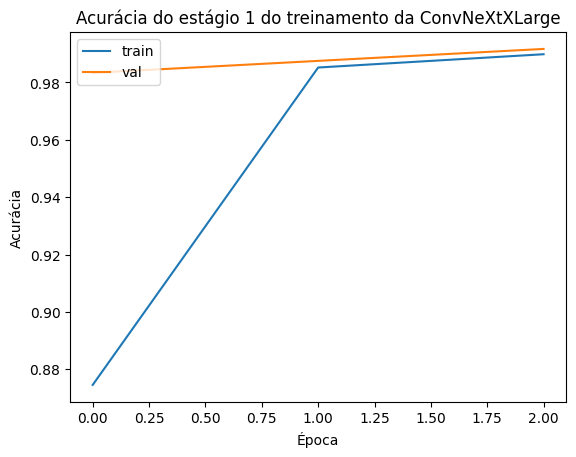

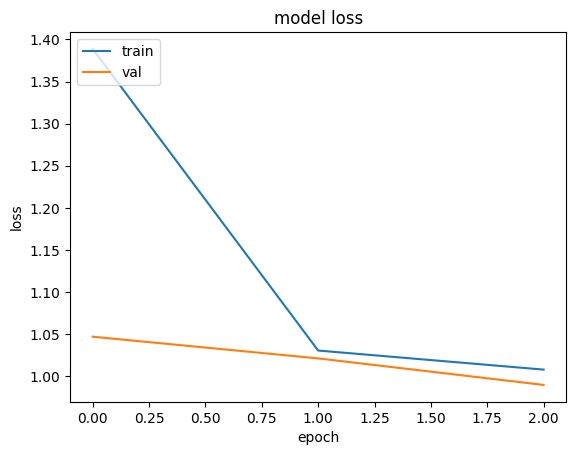

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])

plt.title('Acurácia do estágio 1 do treinamento da ConvNeXtXLarge')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ convnext_xlarge (Functional)         │ (None, 7, 7, 2048)          │     348,147,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 2048)                │           8,192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 64)                  │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 351,410,699 (1.31 GB)

 Trainable params: 1,086,211 (4.14 MB)

 Non-trainable params: 348,152,064 (1.30 GB)

 Optimizer params: 2,172,424 (8.29 MB)

In [ ]:
model.trainable = True

In [ ]:
# Desbloquear todas as camadas da convnext_xlarge
for layer in model.layers[0].layers:
    layer.trainable = True

# Exibir o sumário novamente para verificar se as camadas estão treináveis
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ convnext_xlarge (Functional)         │ (None, 7, 7, 2048)          │     348,147,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 2048)                │           8,192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 64)                  │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 351,410,699 (1.31 GB)

 Trainable params: 349,234,179 (1.30 GB)

 Non-trainable params: 4,096 (16.00 KB)

 Optimizer params: 2,172,424 (8.29 MB)

In [ ]:
es = EarlyStopping(monitor='val_categorical_accuracy', mode='max', patience=5,  restore_best_weights=True)
with tf.device('/device:GPU:0'):
  history2=model.fit(data_generator.flow(X_train, y_train, batch_size=batch_size), epochs=50, validation_data=(X_valid, y_valid), callbacks=[es])

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 47s 3s/step - categorical_accuracy: 0.9909 - loss: 0.9942 - val_categorical_accuracy: 0.9917 - val_loss: 0.9622
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - categorical_accuracy: 0.9887 - loss: 0.9717 - val_categorical_accuracy: 0.9917 - val_loss: 0.9390
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 46s 3s/step - categorical_accuracy: 0.9923 - loss: 0.9249 - val_categorical_accuracy: 0.9958 - val_loss: 0.9069
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - categorical_accuracy: 0.9905 - loss: 0.9086 - val_categorical_accuracy: 0.9958 - val_loss: 0.8746
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 46s 3s/step - categorical_accuracy: 0.9939 - loss: 0.8700 - val_categorical_accuracy: 0.9958 - val_loss: 0.8467
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - categorical_accuracy: 0.9945 - loss: 0.8411 - val_categorical_accuracy: 0.9958 - val_loss: 0.8169
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - categorical_accuracy: 0.9944 - loss: 0.8107 - val_categorical_

dict_keys(['categorical_accuracy', 'loss', 'val_categorical_accuracy', 'val_loss'])


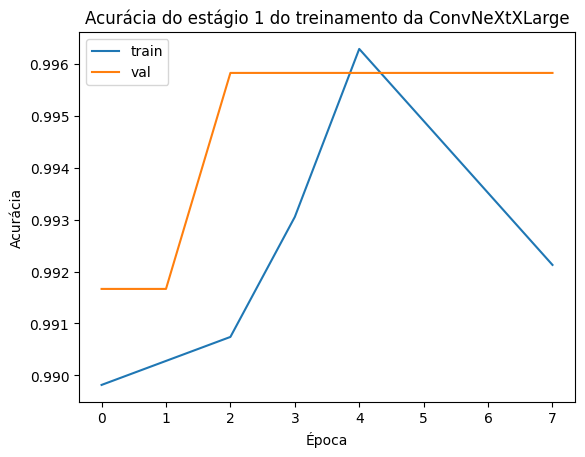

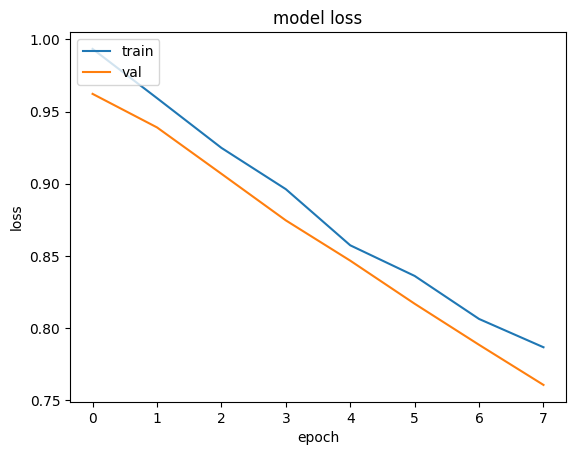

In [ ]:
print(history2.history.keys())
# summarize history for accuracy
plt.plot(history2.history['categorical_accuracy'])
plt.plot(history2.history['val_categorical_accuracy'])

plt.title('Acurácia do estágio 1 do treinamento da ConvNeXtXLarge')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(['train', 'val','train top 5', 'val top 5'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

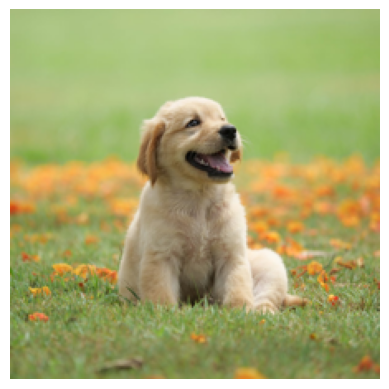

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
classificação do modelo:  dogs
[[0.00191874 0.9871236  0.01095776]]


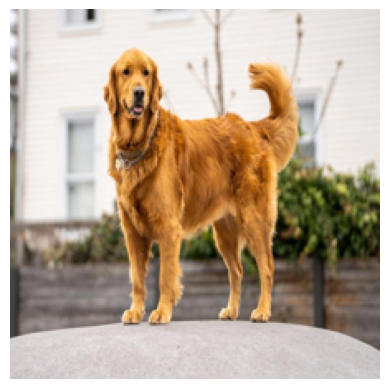

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
classificação do modelo:  dogs
[[0.00231339 0.9910664  0.0066202 ]]


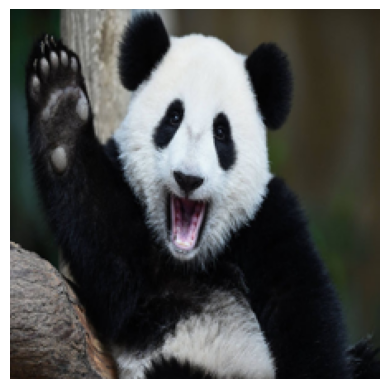

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
classificação do modelo:  panda
[[8.6907188e-20 6.3131134e-14 1.0000000e+00]]


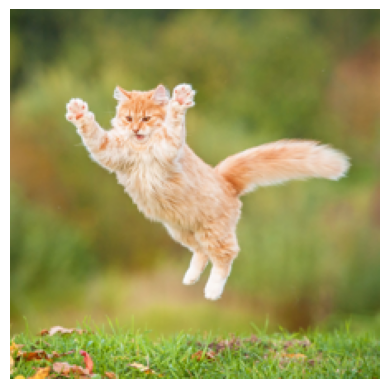

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
classificação do modelo:  cats
[[9.9944347e-01 1.8623227e-04 3.7033454e-04]]


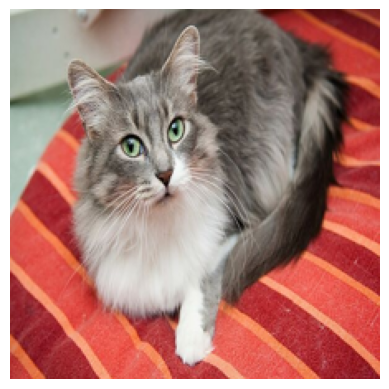

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
classificação do modelo:  cats
[[9.9997020e-01 3.4601719e-06 2.6388387e-05]]


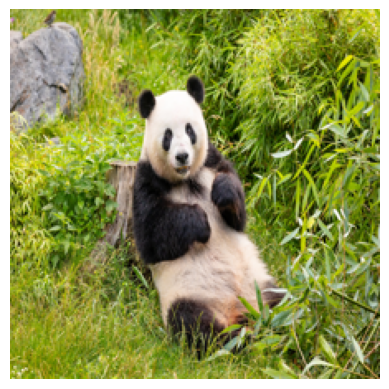

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
classificação do modelo:  panda
[[4.2330973e-19 6.6912188e-13 1.0000000e+00]]


In [ ]:
for i in urls:
  response = requests.get(i)
  image = Image.open(BytesIO(response.content))
  image = image.resize(image_size)
  # Converte a imagem para um array numpy
  image_array = img_to_array(image,dtype=np.uint8)

  plt.imshow(img_to_array(image,dtype=np.uint8))
  plt.axis('off')  # Hide axis
  plt.show()

  # Adiciona uma dimensão para transformar o array em um batch de tamanho 1
  image_array = np.expand_dims(image_array, axis=0)
  predictions = model.predict(image_array)
  print("classificação do modelo: ",categorias_dataset[np.argmax(predictions)])
  print(predictions)

19/19 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step


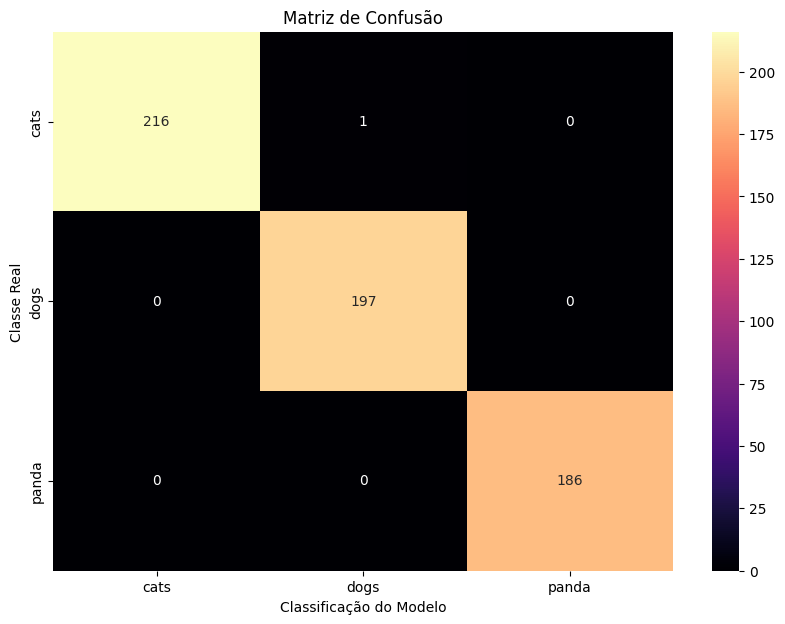

              precision    recall  f1-score   support

        cats       1.00      1.00      1.00       217
        dogs       0.99      1.00      1.00       197
       panda       1.00      1.00      1.00       186

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



In [ ]:
y_cm=np.argmax(y_test,axis=1)
preds_cm = model.predict(X_test)
preds_cm = (tf.argmax(preds_cm,axis=1))
Cm = confusion_matrix(y_cm, preds_cm)
plt.figure(figsize = (10,7))
sns.heatmap(Cm, annot=True, fmt='d', cmap="magma", xticklabels=categorias_dataset, yticklabels=categorias_dataset)
plt.xlabel('Classificação do Modelo')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()
print(classification_report(y_cm,preds_cm, target_names=categorias_dataset))

IndexError: index 1 is out of bounds for axis 0 with size 1

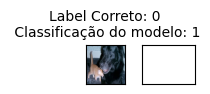

In [ ]:
wrong = tf.cast(preds_cm, y_cm.dtype) != y_cm
X, y, preds = X_test[wrong], y_cm[wrong], preds_cm[wrong]



ValueError: num must be an integer with 1 <= num <= 1, not 2

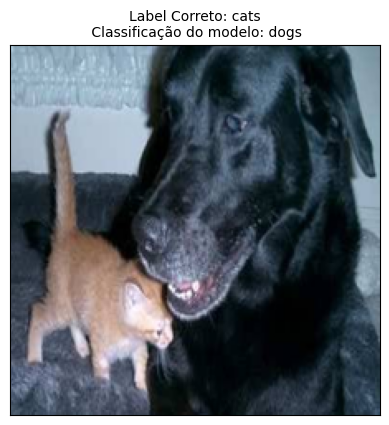

In [ ]:
for i in range(len(wrong)):
    plt.subplot(1, 1, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i]/255)

    plt.title(f'Label Correto: {categorias_dataset[y[i]]}\n Classificação do modelo: {categorias_dataset[preds[i]]}', fontsize=10)
plt.show()